In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter, welch

In [15]:
order = 4 # 4th order filter
sampling_rate = 500.0 # Hz
    # Define the low and high cutoff frequencies
low_cutoff_frequency = 1.0 # Hz
high_cutoff_frequency = 50.0 # Hz

    # Calculate the Nyquist frequency
nyquist_frequency = 0.5 * sampling_rate
# Normalize the frequencies
low_cutoff_normalized = low_cutoff_frequency / nyquist_frequency
high_cutoff_normalized = high_cutoff_frequency / nyquist_frequency

    # Design the Butterworth band-pass filter
b, a = butter(order, [low_cutoff_normalized, high_cutoff_normalized], btype='band')

    # Replace this with your actual data
data = np.loadtxt("data.dat")
filtered_data_a = lfilter(b, a, data[:,0])
filtered_data_b = lfilter(b, a, data[:,1])


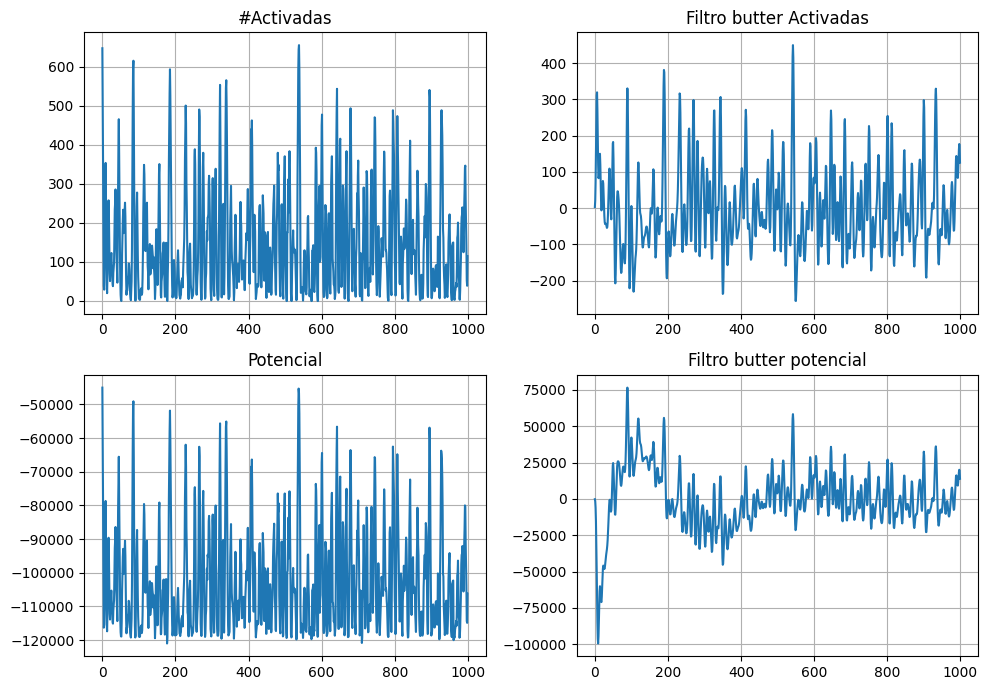

In [16]:
fig = plt.figure(figsize=(10, 7))

plt.subplot(2, 2, 1)
plt.plot(data[:,0], label='# Activadas')
plt.title("#Activadas")
plt.grid()

# Añade la segunda subgráfica y grafica el segundo conjunto de datos filtrado
plt.subplot(2, 2, 2)
plt.plot(filtered_data_a, label='Filtro butter Activadas')
plt.title("Filtro butter Activadas")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(data[:,1], label='Potencial')
plt.title("Potencial")
plt.grid()

# Añade la segunda subgráfica y grafica el segundo conjunto de datos filtrado
plt.subplot(2, 2, 4)
plt.plot(filtered_data_b, label='Filtro butter potencial')
plt.title("Filtro butter potencial")
plt.grid()

# Muestra la figura con las subgráficas
plt.tight_layout() # Ajusta el layout para que las subgráficas no se solapen
plt.show()


In [9]:
L,Q,Lrest,Lreltive,apha,t=np.loadtxt("input.txt")
L

40.0

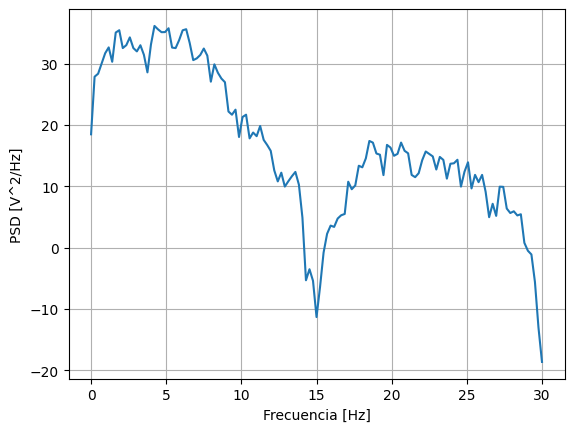

In [26]:
NFFT = 256
OVERLAP = NFFT/2 # Time scale
dt = 1.0 / 60.0 # Sampling rate
fs = 1.0 / dt # Frequency scale



# Calcular la PSD usando el método de Welch
frequencies, psd = welch(data[:,0], fs, nperseg=NFFT, noverlap=OVERLAP)
alplitud=np.zeros_like(psd)
# Imprimir los resultados
for i in range(len(frequencies)):
    alplitud[i]=10 * np.log10(psd[i])

# Graficar la PSD
plt.plot(frequencies, alplitud)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('PSD [V^2/Hz]')
plt.grid(True)
plt.show()



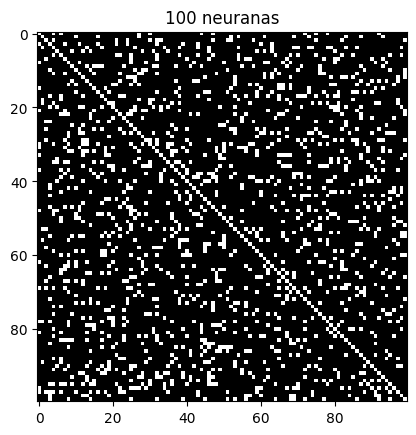

In [30]:
matriz = np.loadtxt('matriz.dat')

# Visualizar la matriz con imshow
plt.imshow(matriz, cmap='binary')
# Muestra la gráfica
plt.title("100 neuranas")
plt.show()



0.016